# Explore samples, classified data characters

## Analyse perfect Water/NonWater pixels characteristics

In [1]:
from __future__ import print_function

import os, sys

import numpy as np

from numpy import genfromtxt

import pandas as pd
#import pandas.io.data
from pandas_datareader import data, wb
from pandas import DataFrame



%matplotlib inline
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10 # increase plot size a bit...
rcParams['axes.formatter.useoffset'] = False  # disable scalar formatter / offset in axes labels

In [2]:
!ls /g/data/u46/fxz547/wofs_training_sample_data/
#my_file_csv='/g/data/u46/fxz547/wofs_training_sample_data/orig_copy/Test_Tile_samples_20140203.csv'
my_file_csv='/g/data/u46/fxz547/wofs_training_sample_data/all_samples_6bands_pq_class.csv'

all_samples_6bands_pq_class.csv  all_samples.csv  orig_copy


In [3]:
df = pd.read_csv(my_file_csv)
    

In [4]:
df.head()

,Class_name,Mean_PQMas,Mean_tm1c,Mean_tm2c,Mean_tm3c,Mean_tm4c,Mean_tm5c,Mean_tm7c
0,CloudShadow_Bare,16383.0,360.0,491.0,497.0,822.0,946.0,562.0
1,CloudShadow_Bare,16383.0,377.0,459.0,548.0,856.0,1060.0,594.0
2,CloudShadow_Bare,16383.0,410.0,555.0,600.0,890.0,1014.0,690.0
3,CloudShadow_Veg,16383.0,551.0,742.0,829.0,1089.0,1080.0,720.0
4,W_LargeBody,16383.0,408.0,842.0,807.0,1193.0,558.0,242.0


In [5]:
df.Mean_PQMas.unique()

array([ 16383.,  15871.,   8191.,   4095.,  16367.,  12287.,  15359.,
        16255.,  16127.,  14847.,  15743.,  16382.,  10239.,  14335.,
        16031.,  16111.,  13311.,   4079.,   3967.,  14334.,  15615.,
        15855.,  16378.,  15358.,  12799.,  13310.,  16239.,  13306.,
        14318.,  14319.,  16366.,  15354.,  15344.,  15346.,  16370.,
        16368.,  13296.,  13298.,  14330.])

In [6]:
df.shape

(6234960, 8)

In [7]:
# add a column for Xu's MDWI (B2-B5)/(B2+B5)     Bgreen B Bshortwaveinfrared1
import math

df['MDWI_XU']=(df.Mean_tm2c - df.Mean_tm5c)/(df.Mean_tm5c + df.Mean_tm2c)

#new normalized XU water index

V_NORM = math.sqrt(1+1)  #The vector (1,-1)
rscale= 1.0/V_NORM
df['MDWI_XU_NEW']= rscale*(df.Mean_tm2c - df.Mean_tm5c)/np.sqrt(df.Mean_tm5c**2 + df.Mean_tm2c**2)

In [8]:
df.head()

,Class_name,Mean_PQMas,Mean_tm1c,Mean_tm2c,Mean_tm3c,Mean_tm4c,Mean_tm5c,Mean_tm7c,MDWI_XU,MDWI_XU_NEW
0,CloudShadow_Bare,16383.0,360.0,491.0,497.0,822.0,946.0,562.0,-0.316632,-0.301862
1,CloudShadow_Bare,16383.0,377.0,459.0,548.0,856.0,1060.0,594.0,-0.395655,-0.367905
2,CloudShadow_Bare,16383.0,410.0,555.0,600.0,890.0,1014.0,690.0,-0.292543,-0.280775
3,CloudShadow_Veg,16383.0,551.0,742.0,829.0,1089.0,1080.0,720.0,-0.185510,-0.182398
4,W_LargeBody,16383.0,408.0,842.0,807.0,1193.0,558.0,242.0,0.202857,0.198808


In [9]:
#add the AWEI shadow Feyisa etc 2104
df['AWEISH_FEYISA'] = (df.Mean_tm1c + 2.5*df.Mean_tm2c -1.5*df.Mean_tm4c -1.5*df.Mean_tm5c -0.25*df.Mean_tm7c)

#new normalized FEYISA water shadow index

V_NORM = math.sqrt(1 + 2.5*2.5 + 1.5*1.5 +1.5*1.5 + 0.25*0.25 )  #The Ref Vector (1, 2.5, -1.5, -1.5, -0.25)
print("Ref Vector Norm = ", V_NORM)
rscale= 1.0/V_NORM
# scaled by the Band Vect Norm
df['AWEISH_FEYISA_NEW'] = rscale*(df.Mean_tm1c + 2.5*df.Mean_tm2c -1.5*df.Mean_tm4c -1.5*df.Mean_tm5c -0.25*df.Mean_tm7c)/np.sqrt(df.Mean_tm1c**2 + df.Mean_tm2c**2 + df.Mean_tm4c**2 +df.Mean_tm5c**2 + df.Mean_tm7c**2)


Ref Vector Norm =  3.43693177122


In [10]:
df.iloc[:,[-2,-1]].head()

,AWEISH_FEYISA,AWEISH_FEYISA_NEW
0,-1205.0,-0.233366
1,-1498.0,-0.272303
2,-1231.0,-0.215105
3,-1027.5,-0.154901
4,-174.0,-0.030991


In [11]:
# Add A Fisher etal Linear Discrenant WI
df['LDWI_FISHER'] = 1.7204 +171*df.Mean_tm2c + 3*df.Mean_tm3c -70*df.Mean_tm4c -45*df.Mean_tm5c -71*df.Mean_tm7c

#new normalized Fisher's water shadow index, without the shift 1.7204

V_NORM = math.sqrt(171*171 + 3*3 +70*70 + 45*45 + 71*71 )  #The Ref Vector (171, 3, -70, -45, -71)
print("Ref Vector Norm = ", V_NORM)
rscale= 1.0/V_NORM
# scaled by the Band Vect Norm
df['LDWI_FISHER_NEW'] = rscale*(171*df.Mean_tm2c + 3*df.Mean_tm3c -70*df.Mean_tm4c -45*df.Mean_tm5c -71*df.Mean_tm7c)/np.sqrt(df.Mean_tm2c**2 + df.Mean_tm3c**2 + df.Mean_tm4c**2 +df.Mean_tm5c**2 + df.Mean_tm7c**2)


Ref Vector Norm =  203.017240647


In [12]:
df.iloc[:,-6:].head()

,MDWI_XU,MDWI_XU_NEW,AWEISH_FEYISA,AWEISH_FEYISA_NEW,LDWI_FISHER,LDWI_FISHER_NEW
0,-0.316632,-0.301862,-1205.0,-0.233366,-54558.2796,-0.174402
1,-0.395655,-0.367905,-1498.0,-0.272303,-69659.2796,-0.208046
2,-0.292543,-0.280775,-1231.0,-0.215105,-60213.2796,-0.172267
3,-0.185510,-0.182398,-1027.5,-0.154901,-46579.2796,-0.113196
4,0.202857,0.198808,-174.0,-0.030991,20602.7204,0.057143


In [13]:
# select the GA-good pixels according to the PQ flag=16383
pdf= df[df['Mean_PQMas'] == 16383.0]  # where(Mean_PQMas=16383)

In [14]:
pdf.shape

(4937172, 14)

In [15]:
# Group by Pixel Class_name, then count the number of rows in each group
pdf.groupby('Class_name').count()

,Mean_PQMas,Mean_tm1c,Mean_tm2c,Mean_tm3c,Mean_tm4c,Mean_tm5c,Mean_tm7c,MDWI_XU,MDWI_XU_NEW,AWEISH_FEYISA,AWEISH_FEYISA_NEW,LDWI_FISHER,LDWI_FISHER_NEW
Class_name,,,,,,,,,,,,,
Bare,823985,823985,823985,823985,823985,823985,823985,823985,823985,823985,823985,823985,823985
BldShadow,5348,5348,5348,5348,5348,5348,5348,5348,5348,5348,5348,5348,5348
CloudShadow_Bare,35265,35265,35265,35265,35265,35265,35265,35265,35265,35265,35265,35265,35265
CloudShadow_Veg,30765,30765,30765,30765,30765,30765,30765,30765,30765,30765,30765,30765,30765
CloudShadow_Water,651,651,651,651,651,651,651,651,651,651,651,651,651
Cropping_Bare,120054,120054,120054,120054,120054,120054,120054,120054,120054,120054,120054,120054,120054
Cropping_DenseVeg,67931,67931,67931,67931,67931,67931,67931,67931,67931,67931,67931,67931,67931
Dark_Soil,87163,87163,87163,87163,87163,87163,87163,87163,87163,87163,87163,87163,87163
Road,12707,12707,12707,12707,12707,12707,12707,12707,12707,12707,12707,12707,12707


In [16]:
pdf.groupby('Mean_PQMas').count()  # perfect good pixels

,Class_name,Mean_tm1c,Mean_tm2c,Mean_tm3c,Mean_tm4c,Mean_tm5c,Mean_tm7c,MDWI_XU,MDWI_XU_NEW,AWEISH_FEYISA,AWEISH_FEYISA_NEW,LDWI_FISHER,LDWI_FISHER_NEW
Mean_PQMas,,,,,,,,,,,,,
16383.0,4937172,4937172,4937172,4937172,4937172,4937172,4937172,4937172,4937172,4937172,4937172,4937172,4937172


In [17]:
#perfect pixel has a quality flag 13683 in the column Mean_PQMa
bin(16383)

'0b11111111111111'

# Explore  and Discover the classified datasets characteristics 

See http://pandas.pydata.org/pandas-docs/stable/visualization.html


In [18]:
def analyze_df_subset(pdf, classname, colnames, share_x=False):
    """
    Analyse a subset of the sample data, pandas dataframe pdf
    selecting the rows with attribute value classname, and a list of columnnames
    """
    # colnames =['MDWI_XU', 'AWEISH_FEYISA', 'LDWI_FISHER']
    # classname= 'W_Sea'
    subpdf = pdf[pdf['Class_name'] ==classname]
    
    Fig_Title = classname
        
    
    subpdf[colnames].hist(layout=(3,1),bins=100, sharex=share_x )
    
    ax = plt.gca()
    ax.set_xlim(-1, 1)
    #ax.set_ylim(0, 1)

    plt.title('Histograms for Training Sample Pixels Class Type: %s '%Fig_Title)

    output_figure_name = classname+'.jpg'
    plt.savefig(output_figure_name)
    #subpdf[colnames].plot()
    

In [19]:

colnames =['MDWI_XU', 'AWEISH_FEYISA', 'LDWI_FISHER']

colnames_new =['MDWI_XU_NEW', 'AWEISH_FEYISA_NEW', 'LDWI_FISHER_NEW']


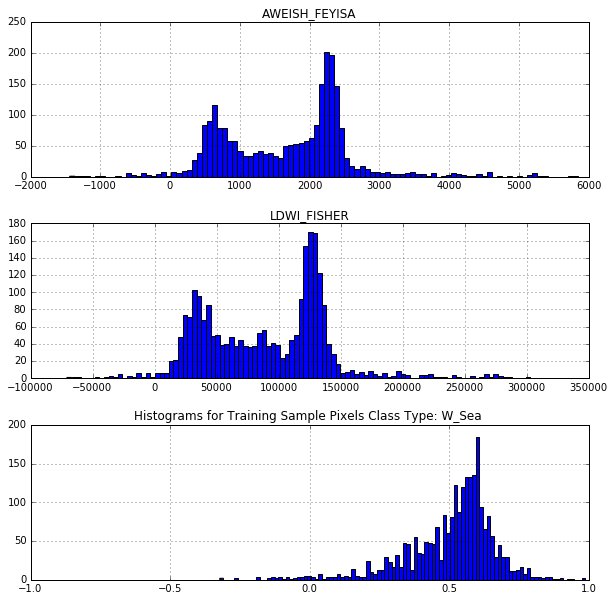

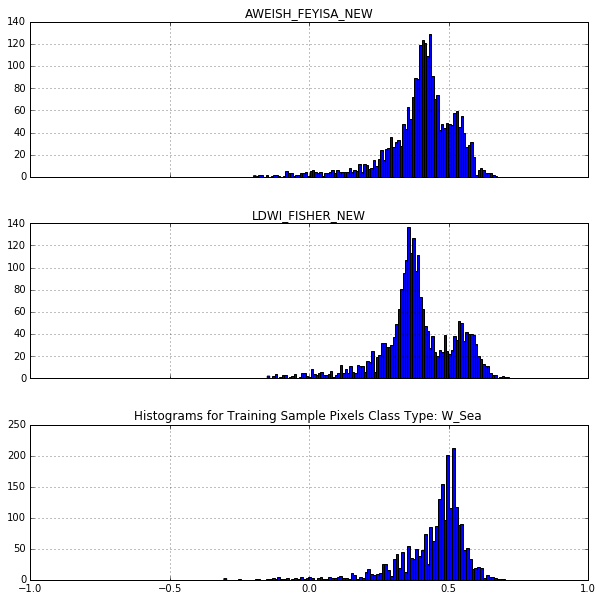

In [20]:
#colnames_new =['MDWI_XU_NEW', 'AWEISH_FEYISA_NEW', 'LDWI_FISHER_NEW']
analyze_df_subset(pdf, 'W_Sea', colnames)
analyze_df_subset(pdf, 'W_Sea', colnames_new, share_x=True)

In [21]:
CLS_NAME=pdf.Class_name.unique()
print (CLS_NAME)
ic=0

['CloudShadow_Bare' 'CloudShadow_Veg' 'W_LargeBody' 'W_Sea' 'W_Swamp'
 'BldShadow' 'W_Estuary' 'Dark_Soil' 'W_Salt_Lake' 'CloudShadow_Water'
 'TerrainShadow_Veg' 'W_River' 'W_SmallBody' 'W_SalineFlats' 'W_Turbid'
 'W_Dark' 'W_VegMix' 'Road' 'Snow' 'TerrainShadow_Snow' 'Bare'
 'Cropping_DenseVeg' 'V_Grassland' 'V_Riparian' 'V_Forest' 'Salt'
 'TerrainShadow_Bare' 'Cropping_Bare']


Looking at  CloudShadow_Bare


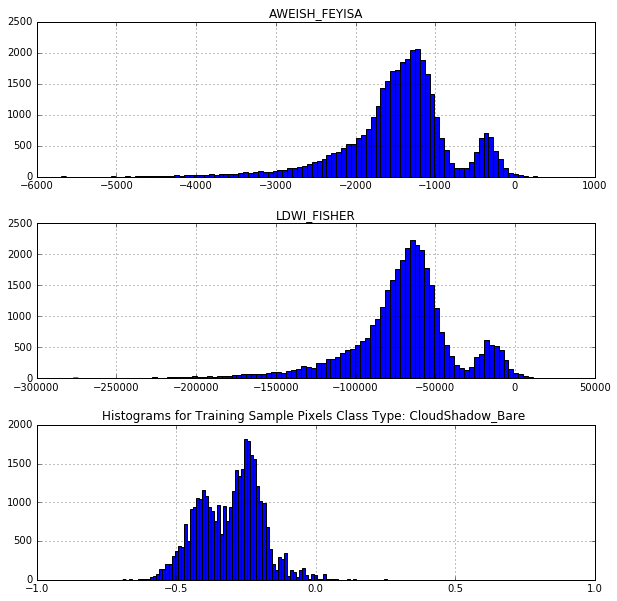

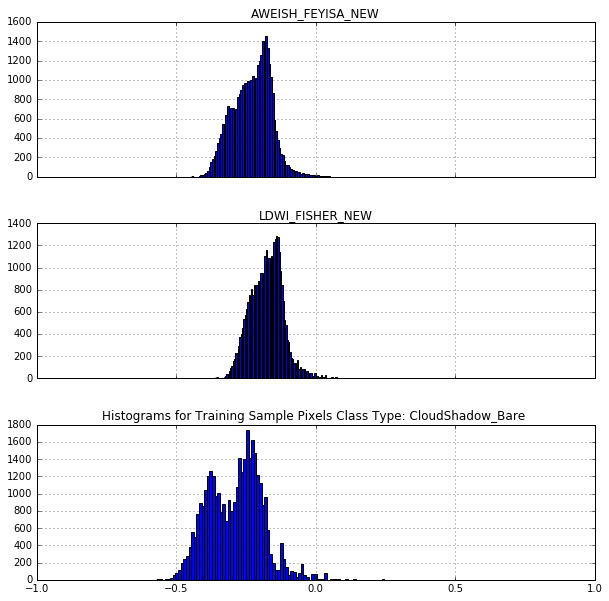

In [22]:
# loop over all classes to show histograms 
if (ic >= len(CLS_NAME)):
    ic=0
else:
    pass

cname=CLS_NAME[ic]
print ('Looking at ',cname)

analyze_df_subset(pdf, cname, colnames)

analyze_df_subset(pdf, cname, colnames_new, share_x=True)

#dfs.shape

# X_ = dfs[pred_cols].values

# print len(X_)
# prod = proj2pe(X_)

ic=ic+1


# Separate the Water and NonWater Pixels

In [23]:
# Add a new column  Assign W_* into Water; all other classes into NotWater. Binary classes

pdf['water01'] = 0 # add a new column myclass
# change the column myclass to datatype uint8
pdf['water01'] =pdf['water01'].astype('uint8')

w_condition= pdf.Class_name.str.startswith('W') | pdf.Class_name.str.endswith('_Water')   #match('^W_*') and CloudShadow_Water

pdf.loc[w_condition, 'water01'] = 128 #redefine 'Water'


dfwater=pdf[pdf['water01'] == 128]
dfnowater= pdf[pdf['water01'] ==0]

print(dfwater.shape, dfnowater.shape)

/g/data1/u46/users/fxz547/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/g/data1/u46/users/fxz547/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/g/data/u46/fxz547/anaconda2/lib/python2.7/site-packages/pandas/core/indexing.py:461: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

(948228, 15) (3988944, 15)


In [24]:
dfwater.water01.dtype

dtype('uint8')

In [25]:
pdf.head()

,Class_name,Mean_PQMas,Mean_tm1c,Mean_tm2c,Mean_tm3c,Mean_tm4c,Mean_tm5c,Mean_tm7c,MDWI_XU,MDWI_XU_NEW,AWEISH_FEYISA,AWEISH_FEYISA_NEW,LDWI_FISHER,LDWI_FISHER_NEW,water01
0,CloudShadow_Bare,16383.0,360.0,491.0,497.0,822.0,946.0,562.0,-0.316632,-0.301862,-1205.0,-0.233366,-54558.2796,-0.174402,0
1,CloudShadow_Bare,16383.0,377.0,459.0,548.0,856.0,1060.0,594.0,-0.395655,-0.367905,-1498.0,-0.272303,-69659.2796,-0.208046,0
2,CloudShadow_Bare,16383.0,410.0,555.0,600.0,890.0,1014.0,690.0,-0.292543,-0.280775,-1231.0,-0.215105,-60213.2796,-0.172267,0
3,CloudShadow_Veg,16383.0,551.0,742.0,829.0,1089.0,1080.0,720.0,-0.185510,-0.182398,-1027.5,-0.154901,-46579.2796,-0.113196,0
4,W_LargeBody,16383.0,408.0,842.0,807.0,1193.0,558.0,242.0,0.202857,0.198808,-174.0,-0.030991,20602.7204,0.057143,128


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2822956190>],
       [<matplotlib.axes._subplots.AxesSubplot object at 0x7f28226e8610>]], dtype=object)

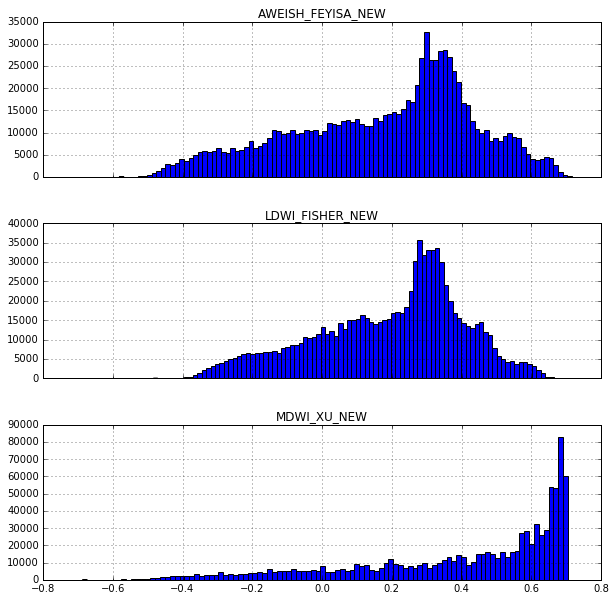

In [26]:
dfwater[colnames_new].hist(layout=(3,1),bins=100, sharex=True )

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2823532f90>],
       [<matplotlib.axes._subplots.AxesSubplot object at 0x7f2822ca69d0>]], dtype=object)

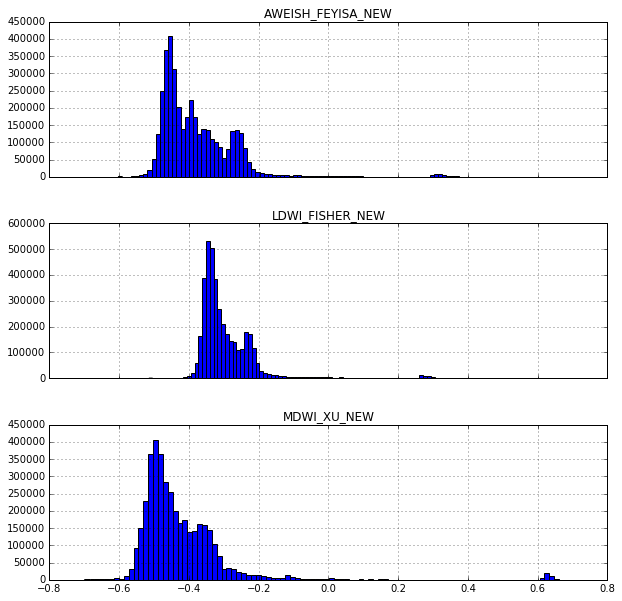

In [27]:
dfnowater[colnames_new].hist(layout=(3,1),bins=100, sharex=True )

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2822956bd0>],
       [<matplotlib.axes._subplots.AxesSubplot object at 0x7f2822b6b2d0>]], dtype=object)

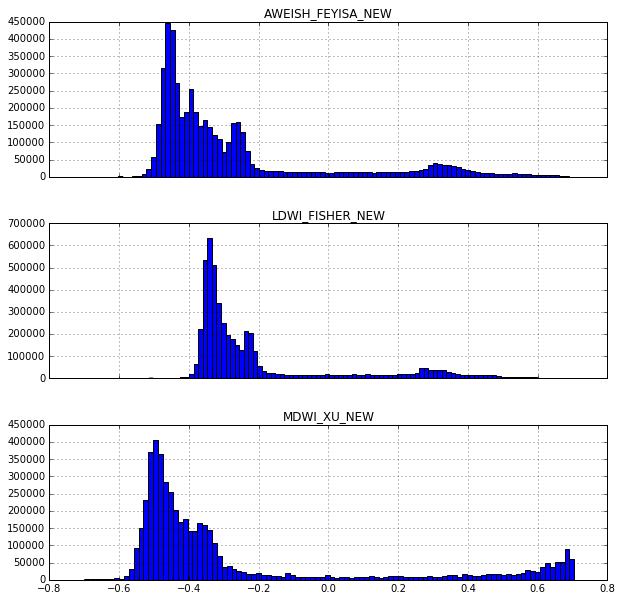

In [28]:
pdf[colnames_new].hist(layout=(3,1),bins=100, sharex=True )

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f28233abad0>],
       [<matplotlib.axes._subplots.AxesSubplot object at 0x7f27b1545e50>]], dtype=object)

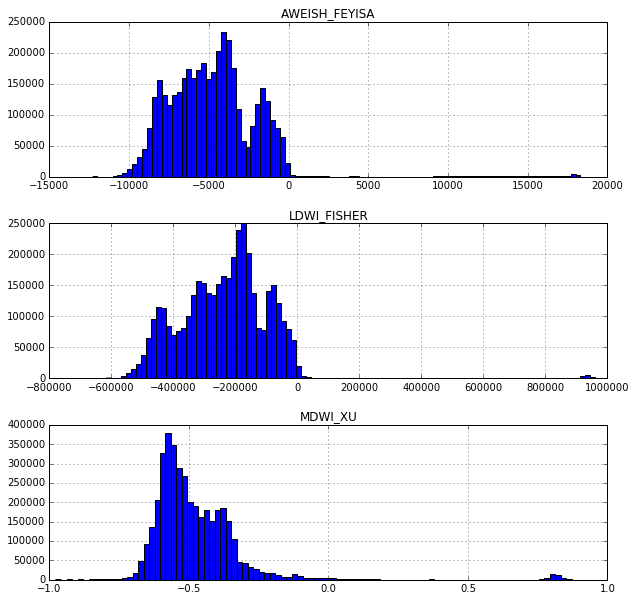

In [29]:
dfnowater[colnames].hist(layout=(3,1),bins=100, sharex=False )

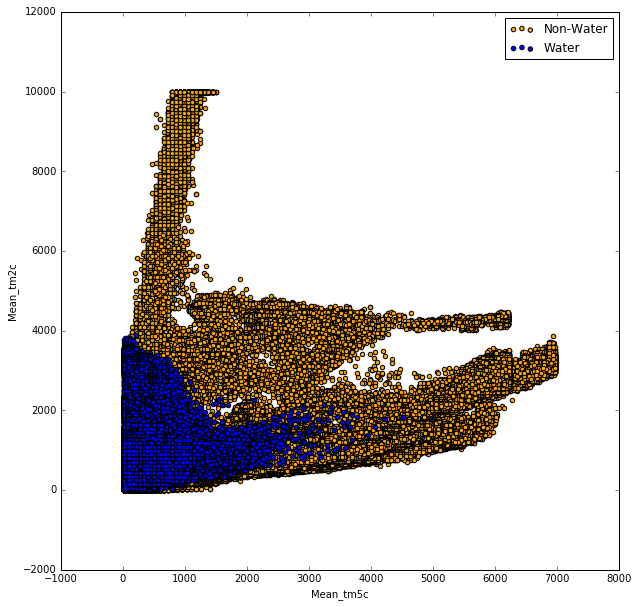

In [30]:

ax= dfnowater.plot.scatter(x='Mean_tm5c', y='Mean_tm2c',color='Orange', label='Non-Water') #,marker = '*');

dfwater.plot.scatter(x='Mean_tm5c', y='Mean_tm2c',  color='Blue', label='Water', ax=ax)

# Feature Selection

In [31]:
pdf.columns

Index([u'Class_name', u'Mean_PQMas', u'Mean_tm1c', u'Mean_tm2c', u'Mean_tm3c',
       u'Mean_tm4c', u'Mean_tm5c', u'Mean_tm7c', u'MDWI_XU', u'MDWI_XU_NEW',
       u'AWEISH_FEYISA', u'AWEISH_FEYISA_NEW', u'LDWI_FISHER',
       u'LDWI_FISHER_NEW', u'water01'],
      dtype='object')

In [32]:
clm_list = []
for column in pdf.columns: clm_list.append(column)
    
print (clm_list)

['Class_name', 'Mean_PQMas', 'Mean_tm1c', 'Mean_tm2c', 'Mean_tm3c', 'Mean_tm4c', 'Mean_tm5c', 'Mean_tm7c', 'MDWI_XU', 'MDWI_XU_NEW', 'AWEISH_FEYISA', 'AWEISH_FEYISA_NEW', 'LDWI_FISHER', 'LDWI_FISHER_NEW', 'water01']


In [33]:
#  feature attributes as predictive columns
# Note that the order of these variables does not matter. The same decision tree will be arrived
pred_cols =clm_list[2:-1]

print (pred_cols)

['Mean_tm1c', 'Mean_tm2c', 'Mean_tm3c', 'Mean_tm4c', 'Mean_tm5c', 'Mean_tm7c', 'MDWI_XU', 'MDWI_XU_NEW', 'AWEISH_FEYISA', 'AWEISH_FEYISA_NEW', 'LDWI_FISHER', 'LDWI_FISHER_NEW']


In [34]:
#select the columns values into numpy array, in preparation for scikit-learn 

X= pdf[pred_cols].values

y = pdf['water01'].values  # the new column myclass
       
print (X.shape, type(X), X.dtype)
print (y.shape, y.dtype)

(4937172, 12) <type 'numpy.ndarray'> float64
(4937172,) uint8


In [35]:

# Recursive Feature Elimination
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# load the iris datasets
dataset = datasets.load_iris()
# create a base classifier used to evaluate a subset of attributes
model = LogisticRegression()
# create the RFE model and select 3 attributes
rfe = RFE(model, 3)
#Orig  rfe = rfe.fit(dataset.data, dataset.target)
rfe = rfe.fit(X, y)
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

[ True  True False False  True False False False False False False False]
[ 1  1  2  5  1  3  7  8  4  9  6 10]


In [36]:
from sklearn import datasets
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
# load the iris datasets
dataset = datasets.load_iris()
# fit an Extra Trees model to the data
model = ExtraTreesClassifier()

### model.fit(dataset.data, dataset.target)
model.fit(X, y)

# display the relative importance of each attribute
print(model.feature_importances_)

[ 0.02049598  0.0215369   0.01929127  0.0202224   0.11355921  0.06708693
  0.11987607  0.14614417  0.14001307  0.11718229  0.08026994  0.13432175]


In [37]:
MaxDepth=3
from sklearn import tree
def detree_of(MaxDepth):
    clf = tree.DecisionTreeClassifier(max_depth= MaxDepth)
    clf = clf.fit(X, y)

    print(clf.feature_importances_)
    
    return clf

In [38]:
detree_of(1)
detree_of(2)
detree_of(3)
detree_of(4)
detree_of(5)
detree_of(6)
detree_of(7)
detree_of(8)
detree_of(9)
detree_of(10)

[ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
[ 0.          0.          0.          0.06428538  0.          0.
  0.91796432  0.0177503   0.          0.          0.          0.        ]
[ 0.          0.          0.          0.06278389  0.0203938   0.00296293
  0.01733571  0.89652368  0.          0.          0.          0.        ]
[  3.89160422e-04   0.00000000e+00   2.80049243e-03   6.22459036e-02
   2.01432986e-02   2.92633109e-03   8.85450142e-01   2.28186929e-02
   0.00000000e+00   0.00000000e+00   3.22597863e-03   0.00000000e+00]
[  4.63525287e-03   0.00000000e+00   2.79909911e-03   6.74161746e-02
   2.00425207e-02   3.97554485e-03   8.97790548e-01   0.00000000e+00
   1.15569932e-05   0.00000000e+00   3.32930291e-03   0.00000000e+00]
[  6.88867735e-03   2.14083330e-03   2.77449765e-03   7.02056511e-02
   1.98648005e-02   4.20257627e-03   2.23774404e-02   8.67876702e-01
   1.14451088e-05   3.18391250e-05   3.52768173e-03   9.78555139e-05]
[  7.36135271e-03   3.99737649e-03   3.2

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [39]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# iris = load_iris()
# X, y = iris.data, iris.target
for ki in xrange(1,7):
    
    X_selected = SelectKBest(k=ki).fit_transform(X, y)
    print('which coluns are selected for ki= ', ki)
    print(X_selected[:5])

which coluns are selected for ki=  1
[[-0.30186156]
 [-0.36790511]
 [-0.28077507]
 [-0.18239844]
 [ 0.19880781]]
which coluns are selected for ki=  2
[[-0.31663187 -0.30186156]
 [-0.39565504 -0.36790511]
 [-0.29254302 -0.28077507]
 [-0.18551043 -0.18239844]
 [ 0.20285714  0.19880781]]
which coluns are selected for ki=  3
[[-0.31663187 -0.30186156 -0.17440231]
 [-0.39565504 -0.36790511 -0.20804621]
 [-0.29254302 -0.28077507 -0.1722669 ]
 [-0.18551043 -0.18239844 -0.11319647]
 [ 0.20285714  0.19880781  0.05714346]]
which coluns are selected for ki=  4
[[-0.31663187 -0.30186156 -0.2333664  -0.17440231]
 [-0.39565504 -0.36790511 -0.27230328 -0.20804621]
 [-0.29254302 -0.28077507 -0.21510461 -0.1722669 ]
 [-0.18551043 -0.18239844 -0.15490107 -0.11319647]
 [ 0.20285714  0.19880781 -0.03099104  0.05714346]]
which coluns are selected for ki=  5
[[ -3.16631872e-01  -3.01861556e-01  -1.20500000e+03  -2.33366402e-01
   -1.74402315e-01]
 [ -3.95655036e-01  -3.67905113e-01  -1.49800000e+03  -2.7230

In [40]:
def plot_forest_importances(X,y):

    """ plot_forest_importances.py
    =========================================
    Feature importances with forests of trees
    =========================================

    This examples shows the use of forests of trees to evaluate the importance of
    features on an artificial classification task. The red bars are the feature
    importances of the forest, along with their inter-trees variability.

    As expected, the plot suggests that 3 features are informative, while the
    remaining are not.
    """
    #print(__doc__)

    import numpy as np

    from sklearn.datasets import make_classification
    from sklearn.ensemble import ExtraTreesClassifier

    # Build a classification task using 3 informative features
#     X, y = make_classification(n_samples=1000,
#                                n_features=10,
#                                n_informative=3,
#                                n_redundant=0,
#                                n_repeated=0,
#                                n_classes=2,
#                                random_state=0,
#                                shuffle=False)

    # Build a forest and compute the feature importances
    forest = ExtraTreesClassifier(n_estimators=250,
                                  random_state=0)

    forest.fit(X, y)
    importances = forest.feature_importances_
    std = np.std([tree.feature_importances_ for tree in forest.estimators_],
                 axis=0)
    indices = np.argsort(importances)[::-1]

    # Print the feature ranking
    print("Feature ranking:")

    for f in range(X.shape[1]):
        print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

    # Plot the feature importances of the forest
    plt.figure()
    plt.title("Feature importances")
    plt.bar(range(X.shape[1]), importances[indices],
           color="r", yerr=std[indices], align="center")
    plt.xticks(range(X.shape[1]), indices)
    plt.xlim([-1, X.shape[1]])
    plt.show()

Feature ranking:
1. feature 7 (0.222135)
2. feature 6 (0.196810)
3. feature 9 (0.133580)
4. feature 11 (0.115742)
5. feature 4 (0.066678)
6. feature 10 (0.057142)
7. feature 8 (0.050305)
8. feature 5 (0.049644)
9. feature 3 (0.035705)
10. feature 1 (0.027165)
11. feature 0 (0.027130)
12. feature 2 (0.017964)


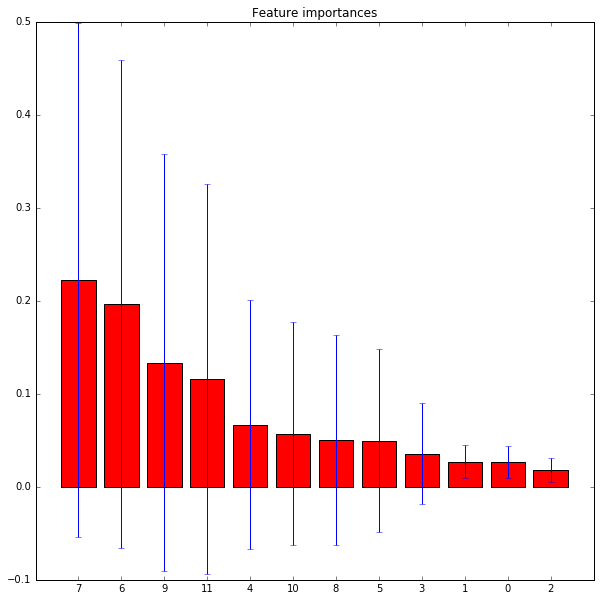

In [41]:
plot_forest_importances(X,y)

In [42]:
X_=X[:,:6]
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

clf = LinearDiscriminantAnalysis()
clf.fit(X_, y)
LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)
#print(clf.predict([[-0.8, -1]]))

clf


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [43]:
clf.coef_

array([[-0.01366641,  0.01757039, -0.00158612, -0.00308776, -0.00117563,
        -0.00117834]])

In [44]:
X_.shape

(4937172, 6)

In [45]:



Break - stop here


1) 2D PCA
2) 3D, 4D PCA
3) Features importance? 
3) systematic feature selection from a large number of 20 derived variables
4) 1-indices decision tree? threshold values?
5) arctan()
6) Ortho-subsp CEM?
7) multiple-targets: pure-Water  mix-water, seemingly-water/false water, nonwater (clearly non-water)



SyntaxError: invalid syntax (<ipython-input-45-895e091c6a91>, line 4)

In [ ]:
colname= ['Mean_tm1c','Mean_tm2c','Mean_tm3c','Mean_tm4c','Mean_tm5c' ] #'NDI_72' #'NDI_52' # 'Bright'   #'Mean_PQMas' #'NDI_43' #'Mean_tm5c'
plt.figure(); dfwater[colname].plot()

In [ ]:
pdf[[clm_list[10],clm_list[12]] ].hist(layout=(1,2),bins=100)  

In [ ]:
#get the column names as list
clm_list = []
for column in pdf.columns: clm_list.append(column)
print clm_list[3:14]


In [ ]:
# histogram, distrubution of the variables
dfwater[[clm_list[10],clm_list[12]] ].hist(layout=(1,2),bins=100)  

In [ ]:
# histogram, distrubution of the ratios feature variables. 
# NDI_43 is close to normal distrib.
# NDI_54 and 74 mostly negative for water
dfwater[[clm_list[9],clm_list[11], clm_list[13] ] ].hist(layout=(1,3),bins=100) 

In [ ]:
# Compare to Not Water pixels !!!
dfnowater[[clm_list[10],clm_list[12]] ].hist(layout=(1,2),bins=100) 

In [ ]:
# histogram for nowaterfeature variables distrubution
# NDI_43  poitive
# NDI_54 and 74 for no-water
dfnowater[[clm_list[9],clm_list[11], clm_list[13] ] ].hist(layout=(1,3),bins=100) 

In [ ]:
dfwater[[clm_list[3],clm_list[4],clm_list[5]] ].hist(layout=(1,3), bins=100)   # BGR distribution?

In [ ]:
dfwater[[clm_list[6],clm_list[7], clm_list[8] ]].hist(layout=(1,3),bins=100)  # not normal distribution

In [ ]:
 dfwater.plot.scatter(x=clm_list[10], y=clm_list[12]);

In [ ]:
dfnowater.plot.scatter(x=clm_list[10], y=clm_list[12]);

In [ ]:
pdf.plot.scatter(x=clm_list[10], y=clm_list[12]);

In [ ]:
from pandas import DataFrame as df
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
 dfnowater['NDI_72'].values

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#notwork c=  pdf['Mean_tm5c'] color must be 2D
#p = ax.scatter(dfwater['NDI_52'], dfwater['NDI_72'], dfwater['Mean_tm5c'], s=40, c=c)
p = ax.scatter(pdf['NDI_52'], pdf['NDI_72'], pdf['Mean_tm5c'], s=40) #, c=c)
 
# Add title and axis labels 
ax.set_xlabel("NDI52")
ax.set_ylabel("NDI72")
ax.set_zlabel("Band5")
 
# add colorbar and show
#NOT WORK fig.colorbar(p)
plt.show()

# Apply Machine Learning Models

In [ ]:
# https://www.google.com.au/webhp?sourceid=chrome-instant&ion=1&espv=2&ie=UTF-8#q=how+to+design+Machine+learning+models+according+feature+stats

## Prepare sample dataset for scikit analysis

In [ ]:
print (clm_list[9], clm_list[11], clm_list[13])

In [ ]:
#select the columns values into numpy array
#X = pdf[clm_list[3:14]].values
# select 3 most important features
X = pdf[[clm_list[9],clm_list[11], clm_list[13]]].values
# Y = pdf[clm_list[1]].values
Y = pdf[clm_list[-1]].values  # the new column Class2
       
print (X.shape, type(X))
print (Y.shape)

##  Scikit-learn: model .fit, .predict, .score 

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=3)

In [ ]:
# Traing the model with the sample data %time clf = clf.fit(X, Y)

clf = clf.fit(X, Y)

In [ ]:
# verify the model using function predict
isample= 227014
# Or get a random sample to compare
#isample=np.random.random_integers(0,999)

print (isample, clf.predict(X[isample,:].reshape(1, -1) ), Y[isample], pdf.Class_name.iloc[isample])

In [ ]:
#3) Apply / evaluate
clf.score(X,Y)

In [ ]:
clf.feature_importances_

In [ ]:
# Advanced_sklearn/Chapter%201/Classification.ipynb
# more methods, split the samples , validation 
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y)

In [ ]:
print (X_test.shape)
clf.score(X_test,y_test)


In [ ]:
from sklearn.cross_validation import cross_val_score
for classifier in [clf]:
    scores = cross_val_score(classifier, X, Y, cv=10)
    print(scores)
    print(np.mean(scores))

In [ ]:
# Let's Generate the Tree.

from IPython.display import Image 
from sklearn.externals.six import StringIO  
import pydot 
with open("de_tree.dot", 'w') as f: f = tree.export_graphviz(clf, out_file=f)

    
# dot -Tpdf iris.dot -o iris.pdf

!dot -Tpdf de_tree.dot -o de_tree.pdf

In [ ]:
# Todo: show Tree in this notebook
# http://scikit-learn.org/stable/modules/tree.html
dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=[clm_list[10],clm_list[12], clm_list[7]],  
                         class_names=Y[:],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

# Google search how to select important feature

** http://machinelearningmastery.com/an-introduction-to-feature-selection/

** http://scikit-learn.org/stable/modules/feature_selection.html
    

# you can pickle the clf tree for later use.

In [ ]:
# http://scikit-learn.org/stable/modules/model_persistence.html

# http://stackoverflow.com/questions/15564410/scikit-learn-svm-how-to-save-load-support-vectors
# 
# show tree

clf.tree_.__getstate__()['nodes']

# Let's Try some other methods

In [ ]:
from sklearn.svm import LinearSVC
svm = LinearSVC(C=0.1)
svm.fit(X_train, y_train)


In [ ]:
print(svm.predict(X_train))
print(y_train)

In [ ]:
svm.score(X_train, y_train)

In [ ]:
svm.score(X_test, y_test)

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=50)
rf.fit(X_train, y_train)

In [ ]:
rf.predict(X_test)

In [ ]:
rf.score(X_test, y_test)

In [ ]:
Stop here. Do acuracy comparison:
    
Random Forest 99.310%  Train slow
LinearSVM 90.799%
DecisionTree(depth=7) 96.756%  Train very fast. Complex tree

# Cross Validation
Advanced_sklearn/Chapter%201/Cross%20Validation.ipynb

In [ ]:
from sklearn.cross_validation import cross_val_score
for classifier in [clf, svm, rf]:
    scores = cross_val_score(classifier, X, Y, cv=5)
    print(scores)
    print(np.mean(scores))

# Results with my_file_csv='/g/data/u46/fxz547/wofs_training_sample_data/orig_copy/Test_Tile_samples_20140203.csv'
# random forest is no better than clf. svm is no good.
# [ 0.93761947  0.9168854   0.93080083  0.96054265  0.97094193]
# cls:  0.943358053934
# [ 0.84295027  0.93209894  0.90567316  0.90808262  0.90809689]
# svm:  0.899380377677
# [ 0.92633591  0.91465293  0.94864626  0.94893796  0.97848818]
# rf: 0.943412249083

In [ ]:
!ls -ltr

# PCA analysis

In [ ]:
#sample function

def sample_PCA(X=None, y=None):
    """
    Code source: Gaël Varoquaux. License: BSD 3 clause
    """
    
    import numpy as np
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D


    from sklearn import decomposition
    from sklearn import datasets

    np.random.seed(5)

    #centers = [[1, 1], [-1, -1], [1, -1]]
    
    iris = datasets.load_iris()
    if (X is None):
        X = iris.data
        y = iris.target
    else:
        pass
    

    fig = plt.figure(1, figsize=(4, 3))
    plt.clf()  # clear figure
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

    plt.cla()
    pca = decomposition.PCA(n_components=3)
    pca.fit(X)
    X = pca.transform(X)

   for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
        ax.text3D(X[y == label, 0].mean(),
                  X[y == label, 1].mean() + 1.5,
                  X[y == label, 2].mean(), name,
                  horizontalalignment='center',
                  bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))

    # Reorder the labels to have colors matching the cluster results
    y = np.choose(y, [1, 2, 0]).astype(np.float)
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.spectral)

    x_surf = [X[:, 0].min(), X[:, 0].max(),
              X[:, 0].min(), X[:, 0].max()]
    y_surf = [X[:, 0].max(), X[:, 0].max(),
              X[:, 0].min(), X[:, 0].min()]
    x_surf = np.array(x_surf)
    y_surf = np.array(y_surf)
    v0 = pca.transform(pca.components_[[0]])
    v0 /= v0[-1]
    v1 = pca.transform(pca.components_[[1]])
    v1 /= v1[-1]

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])

    plt.show()
    
    return

    
sample_PCA()

In [ ]:
print (X.shape)

In [ ]:
# See wofs/Zlocaltest/water_pixels_classification_1.ipynb

#http://stackoverflow.com/questions/27699545/scikit-learn-pca

from sklearn.decomposition import PCA

from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

fig = plt.figure(1, figsize=(4, 3))
plt.clf()  # clear figure


pca = PCA(n_components=3)
pca.fit(X)
pca_score = pca.explained_variance_ratio_   #Eigenvalues 
V = pca.components_   #Eigenvectors(normalized)

print (pca_score)

print (V)

print(pca.get_covariance()) #Covariance Matrix
# x_pca_axis, y_pca_axis, z_pca_axis = V.T * pca_score / pca_score.min()

# x_pca_axis, y_pca_axis, z_pca_axis = 3 * V.T
# x_pca_plane = np.r_[x_pca_axis[:2], - x_pca_axis[1::-1]]
# y_pca_plane = np.r_[y_pca_axis[:2], - y_pca_axis[1::-1]]
# z_pca_plane = np.r_[z_pca_axis[:2], - z_pca_axis[1::-1]]
# x_pca_plane.shape = (2, 2)
# y_pca_plane.shape = (2, 2)
# z_pca_plane.shape = (2, 2)
    
# ax.plot_surface(x_pca_plane, y_pca_plane, z_pca_plane)
# ax.w_xaxis.set_ticklabels([])
# ax.w_yaxis.set_ticklabels([])
# ax.w_zaxis.set_ticklabels([])

plt.plot(pca_score, )

plt.show()


In [ ]:
#Breakp

def classify_pixel(images, float64=False):
    """ 
    Implement the decision tree of Norman Mueller et al, to clssify a pixel with 6-bands input.
    Produce a water classification image from the supplied images (6 bands of an NBAR, multiband Landsat image)
    This method evaluates N.Mueller's 7-depth decision tree as follows:


                    -----------------------------N1---------------------------------
                    |                                                              |
                    |                                                              |
                 ---N2-----                                           -------------N21---------------------
                 |        |                                           |                                   |
                 |        |                                           |                                   |
       ----------N4----   N3                                    ------N22---                           ---N35-------
       |              |                                         |          |                           |           |
       |              |                                         |          |                           |           |
    ---N5---       ---N8--------------                       ---N24----    N23                      ---N37------   N36
    |      |       |                 |                       |        |                             |          |
    |      |       |                 |                       |        |                             |          |
    N6     N7   ---N12------------   N9             ---------N26---   N25                        ---N39-----   N38
                |                |                  |             |                              |         |
                |                |                  |             |                              |         |
             ---N16---        ---N13---             N27   --------N28---                   ------N41---    N40
             |       |        |       |                   |            |                   |          |
             |       |        |       |                   |            |                   |          |
             N17  ---N18---   N14     N15              ---N29---    ---N30---           ---N43---     N42
                  |       |                            |       |    |       |           |       |
                  |       |                            |       |    |       |           |       |
                  N19     N20                          N31     N32  N33     N34         N44     N45


:param images:
    A 3D numpy array ordered in (bands,rows,columns), containing the spectral data.
    It is assumed that the spectral bands follow Landsat 5 & 7, Band 1, Band 2, Band 3, Band 4, Band 5, Band 7.

:param float64:
    Boolean keyword. If set to True then the data will be converted to type float64 if not already float64.
    Default is False.

:return:
    A 2D numpy array of type UInt8.  Values will be 0 for No Water, 1 for Unclassified and 128 for water.

:notes:
    The input array will be converted to type float32 if not already float32.
    If images is of type float64, then images datatype will be left as is.

:transcription:
    Transcribed from a Tree diagram output by CART www.salford-systems.com
    Josh Sixsmith; joshua.sixsmith@ga.gov.au

    """

#     logger = logging.getLogger("WaterClasserfier")
#     logger.debug("Started")

    def band_ratio(a,b):
        """
        Calculates a normalised ratio index.
        """
        c = (a - b) / (a + b)
        return c

    dims = images.shape
    if len(dims) == 3:
        bands = dims[0]
        rows  = dims[1]
        cols  = dims[2]
    else:
        rows = dims[0]
        cols = dims[1]

    dtype = images.dtype

    # Check whether to enforce float64 calcs, unless the datatype is already float64
    # Otherwise force float32
    if float64:
        if (dtype != 'float64'):
            images = images.astype('float64')
    else:
        if (dtype == 'float64'):
            # Do nothing, leave as float64
            images = images
        elif (dtype != 'float32'):
            images = images.astype('float32')

    classified = numpy.ones((rows,cols), dtype='uint8')

    NDI_52 = band_ratio(images[4], images[1])
    NDI_43 = band_ratio(images[3], images[2])
    NDI_72 = band_ratio(images[5], images[1])

    b1 = images[0]
    b2 = images[1]
    b3 = images[2]
    b4 = images[3]
    b5 = images[4]
    b7 = images[5]

    # Lets start going down the trees left branch, finishing nodes as needed
    # Lots of result arrays eg r1, r2 etc of type bool are created
    # These could be recycled to save memory, but at the moment they serve to show the tree structure
    # Temporary arrays of type bool (_tmp, _tmp2) are used to combine the boolean decisions
    r1 = NDI_52 <= -0.01

    r2 = b1 <= 2083.5
    classified[r1 & ~r2] = 0 # Node 3

    r3 = b7 <= 323.5
    _tmp = r1 & r2
    _tmp2 = _tmp & r3
    _tmp &= ~r3

    r4 = NDI_43 <= 0.61
    classified[_tmp2 & r4]  = 128 # Node 6
    classified[_tmp2 & ~r4] = 0 # Node 7

    r5 = b1 <= 1400.5
    _tmp2 = _tmp & ~r5
    r6 = NDI_43 <= -0.01
    classified[_tmp2 & r6]  = 128 # Node 10
    classified[_tmp2 & ~r6] = 0 # Node 11

    _tmp &= r5

    r7 = NDI_72 <= -0.23
    _tmp2 = _tmp & ~r7
    r8 = b1 <= 379
    classified[_tmp2 & r8]  = 128 # Node 14
    classified[_tmp2 & ~r8] = 0 # Node 15

    _tmp &= r7

    r9 = NDI_43 <= 0.22
    classified[_tmp & r9] = 128 # Node 17

    _tmp &= ~r9

    r10 = b1 <= 473
    classified[_tmp & r10]  = 128 # Node 19
    classified[_tmp & ~r10] = 0 # Node 20

    # Left branch is completed; cleanup
    #logger.debug("B4 cleanup 1")
    del r2, r3, r4, r5, r6, r7, r8, r9, r10
    gc.collect()
    #logger.debug("cleanup 1 done")

    # Right branch of the tree
    r1 = ~r1

    r11 = NDI_52 <= 0.23
    _tmp = r1 & r11

    r12 = b1 <= 334.5
    _tmp2 = _tmp & ~r12
    classified[_tmp2] = 0 # Node 23

    _tmp &= r12

    r13 = NDI_43 <= 0.54
    _tmp2 = _tmp & ~r13
    classified[_tmp2] = 0 # Node 25

    _tmp &= r13

    r14 = NDI_52 <= 0.12
    _tmp2 = _tmp & r14
    classified[_tmp2] = 128 # Node 27

    _tmp &= ~r14

    r15 = b3 <= 364.5
    _tmp2 = _tmp & r15

    r16 = b1 <= 129.5
    classified[_tmp2 & r16]  = 128 # Node 31
    classified[_tmp2 & ~r16] = 0 # Node 32

    _tmp &= ~r15

    r17 = b1 <= 300.5
    _tmp2 = _tmp & ~r17
    _tmp &= r17
    classified[_tmp]  = 128 # Node 33
    classified[_tmp2] = 0 # Node 34

    _tmp = r1 & ~r11

    r18 = NDI_52 <= 0.34
    classified[_tmp & ~r18] = 0 # Node 36
    _tmp &= r18

    r19 = b1 <= 249.5
    classified[_tmp & ~r19] = 0 # Node 38
    _tmp &= r19

    r20 = NDI_43 <= 0.45
    classified[_tmp & ~r20] = 0 # Node 40
    _tmp &= r20

    r21 = b3 <= 364.5
    classified[_tmp & ~r21] = 0 # Node 42
    _tmp &= r21

    r22 = b1 <= 129.5
    classified[_tmp & r22]  = 128 # Node 44
    classified[_tmp & ~r22] = 0 # Node 45

    #logger.debug("completed")

    return classified


## Select Perfect Pix Data to Analyse 

In [ ]:
perf_pix= pdf[pdf['Mean_PQMas'] == 16383.0]  # where(Mean_PQMas=16383)

# change W_* into Water; all other classes into NotWater. Binary classes
perf_pix.ix[perf_pix.Class_name.str.match('W_*'), 'Class2'] = 'Water'

# change non 'W_*' into NoWater
perf_pix.ix[perf_pix.Class_name.str.match('^W_*')==False, 'Class2'] = 'NoWater'

# Group by Pixel Class_name, then count the number of rows in each group
perf_pix.groupby('Class2').count()

In [ ]:
# Apply a ML algorithm to the pdf type
from sklearn import tree
from IPython.display import Image 
from sklearn.externals.six import StringIO  
import pydot 
    
def apply_ml(pdf):
    #get the column names as list    
    clm_list = []
    for column in pdf.columns: clm_list.append(column)
    print (clm_list[7],clm_list[10],clm_list[12])
    
    #select the columns values into numpy array
    #X = pdf[clm_list[3:14]].values
    # select 3 most important features
    X= pdf[[clm_list[7],clm_list[10],clm_list[12]] ].values
    Y = pdf[clm_list[1]].values

    print X.shape, type(X)
    print Y.shape

    clf = tree.DecisionTreeClassifier(max_depth=5)
    clf= clf.fit(X,Y)
    
    # evaluate the model using function predict
    # isample=123
    # Or get a random sample to compare
    isample=np.random.random_integers(0,999)

    print (isample, clf.predict(X[isample,:].reshape(1, -1) ), Y[isample])

    dot_filename="de_tree.dot"
    with open(dot_filename, 'w') as f: f = tree.export_graphviz(clf, out_file=f)

    
    # !dot -Tpdf de_tree.dot -o de_tree.pdf
    return  dot_filename

In [ ]:
apply_ml(perf_pix)

!dot -Tpdf de_tree.dot -o de_tree.pdf